In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

In [31]:
msp_mandi = pd.read_csv('CMO_MSP_Mandi.csv')
msp_mandi.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [32]:
msp_mandi.commodity.value_counts()

SUNFLOWER                 8
Ragi_Maldandi             8
SPLIT BLACK GRAM          8
Copra (Ball)_Yellow       8
WHEAT(HUSKED)             8
SESAMUM                   8
Toria_Yellow              8
SPILT GERRN GRAM          8
Copra (Milling)_Yellow    8
COTTON                    8
RICE(PADDY-HUS)           8
Jute_Yellow               8
PADDY-UNHUSKED            8
SORGUM(JAWAR)             8
Masur_Yellow              8
BARLI                     8
COCONUT                   8
Cotton_Long Staple        8
SAFFLOWER                 8
NIGER-SEED                8
PIGEON PEA (TUR)          8
SOYABEAN                  8
Jowar_Hybrid              8
Gram_Yellow               8
MAIZE                     8
BAJRI                     8
Soyabean_Black            8
WHEAT(UNHUSKED)           8
GR.NUT KERNELS            8
MUSTARD                   8
SUGAR-CANE                7
SUGARCANE                 1
Name: commodity, dtype: int64

In [33]:
msp_mandi['commodity'] = msp_mandi['commodity'].replace(['SUGAR-CANE', 'SUGARCANE'], 'Sugarcane')
msp_mandi.commodity.value_counts()

SUNFLOWER                 8
BARLI                     8
SPLIT BLACK GRAM          8
Copra (Ball)_Yellow       8
WHEAT(HUSKED)             8
SESAMUM                   8
Toria_Yellow              8
SPILT GERRN GRAM          8
Copra (Milling)_Yellow    8
COTTON                    8
RICE(PADDY-HUS)           8
Jute_Yellow               8
PADDY-UNHUSKED            8
SORGUM(JAWAR)             8
Masur_Yellow              8
COCONUT                   8
Ragi_Maldandi             8
Cotton_Long Staple        8
SAFFLOWER                 8
NIGER-SEED                8
PIGEON PEA (TUR)          8
Sugarcane                 8
SOYABEAN                  8
Jowar_Hybrid              8
Gram_Yellow               8
MAIZE                     8
BAJRI                     8
Soyabean_Black            8
WHEAT(UNHUSKED)           8
GR.NUT KERNELS            8
MUSTARD                   8
Name: commodity, dtype: int64

In [34]:
monthly_data = pd.read_csv('Monthly_data_cmo.csv')
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Karanja,Wheat(Husked),2018,April,23625,1331,1778,1485,2018-04,Ankola,Maharastra
1,Karanja,Wheat(Husked),2016,April,5445,1596,2138,1773,2016-04,Ankola,Maharastra
2,Karanja,Sorgum(Jawar),2018,April,205,1533,1551,1539,2018-04,Ankola,Maharastra
3,Karanja,Sorgum(Jawar),2016,April,150,1583,1692,1638,2016-04,Ankola,Maharastra
4,Karanja,Gram,2018,April,14200,3399,3960,3730,2018-04,Ankola,Maharastra


In [35]:
print(len(monthly_data.APMC.value_counts()))
print(len(monthly_data.district_name.value_counts()))
print(len(monthly_data.state_name.value_counts()))

347
31
2


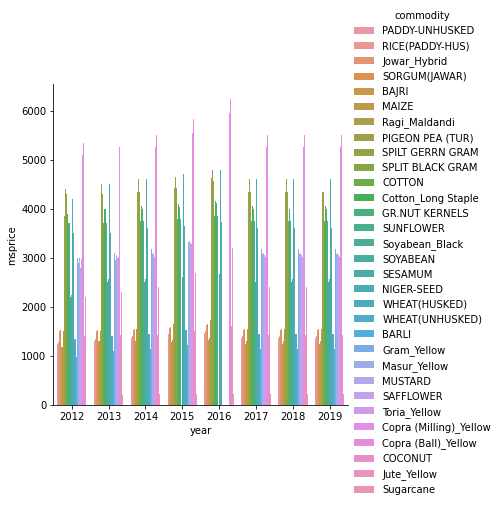

In [36]:
import seaborn as sns
sns.catplot(x='year', y='msprice', hue='commodity', kind="bar", data = msp_mandi)

In [37]:
monthly_data = monthly_data.iloc[:, 0:-2]
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
0,Karanja,Wheat(Husked),2018,April,23625,1331,1778,1485,2018-04
1,Karanja,Wheat(Husked),2016,April,5445,1596,2138,1773,2016-04
2,Karanja,Sorgum(Jawar),2018,April,205,1533,1551,1539,2018-04
3,Karanja,Sorgum(Jawar),2016,April,150,1583,1692,1638,2016-04
4,Karanja,Gram,2018,April,14200,3399,3960,3730,2018-04


In [38]:
monthly_data.index = monthly_data.date
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
date,,,,,,,,,
2018-04,Karanja,Wheat(Husked),2018,April,23625,1331,1778,1485,2018-04
2016-04,Karanja,Wheat(Husked),2016,April,5445,1596,2138,1773,2016-04
2018-04,Karanja,Sorgum(Jawar),2018,April,205,1533,1551,1539,2018-04
2016-04,Karanja,Sorgum(Jawar),2016,April,150,1583,1692,1638,2016-04
2018-04,Karanja,Gram,2018,April,14200,3399,3960,3730,2018-04


In [39]:
monthly_data = monthly_data.iloc[:, 0:-1]
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2018-04,Karanja,Wheat(Husked),2018,April,23625,1331,1778,1485
2016-04,Karanja,Wheat(Husked),2016,April,5445,1596,2138,1773
2018-04,Karanja,Sorgum(Jawar),2018,April,205,1533,1551,1539
2016-04,Karanja,Sorgum(Jawar),2016,April,150,1583,1692,1638
2018-04,Karanja,Gram,2018,April,14200,3399,3960,3730


In [40]:
monthly_data = monthly_data.sort_values(by = ['date'])

In [41]:
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2016-01,Mangalwedha,Pigeon Pea (Tur),2016,January,24,7830,8630,8260
2016-01,Kopargaon,Onion,2016,January,30447,428,1535,1231
2016-01,Newasa,Bajri,2016,January,14,1392,1450,1417
2016-01,Newasa,Wheat(Husked),2016,January,97,1520,1690,1615
2016-01,Newasa,Sorgum(Jawar),2016,January,18,1698,1698,1698


In [42]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [ ]:

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)


def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
try:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plot_svc_decision_function(clf)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');
except:
    print("")

In [43]:
mysore = monthly_data[monthly_data.APMC == 'Mysore']
mysore.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2016-01,Mysore,Cardamom,2016,January,836,41214,80000,60607
2016-01,Mysore,Betelnuts,2016,January,280,30167,32000,31083
2016-01,Mysore,Chillies(Red),2016,January,22384,7087,15000,11043
2016-01,Mysore,Green Chilli,2016,January,61220,3264,3610,3450
2016-01,Mysore,Garlic,2016,January,27581,5931,9428,8108


In [44]:
mysore.shape

(1538, 8)

In [45]:
mysore_potato = mysore[mysore.Commodity == 'Turmeric']
mysore_potato.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2016-01,Mysore,Turmeric,2016,January,1379,6000,10000,8000
2016-02,Mysore,Turmeric,2016,February,3700,6000,10000,8000
2016-03,Mysore,Turmeric,2016,March,5738,6000,10000,8000
2016-04,Mysore,Turmeric,2016,April,4545,6000,10000,8000
2016-05,Mysore,Turmeric,2016,May,4336,6000,10231,8000


In [46]:
mysore_potato = mysore_potato.drop(['APMC', 'Commodity'], 1)
mysore_potato.head()

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,
2016-01,2016,January,1379,6000,10000,8000
2016-02,2016,February,3700,6000,10000,8000
2016-03,2016,March,5738,6000,10000,8000
2016-04,2016,April,4545,6000,10000,8000
2016-05,2016,May,4336,6000,10231,8000


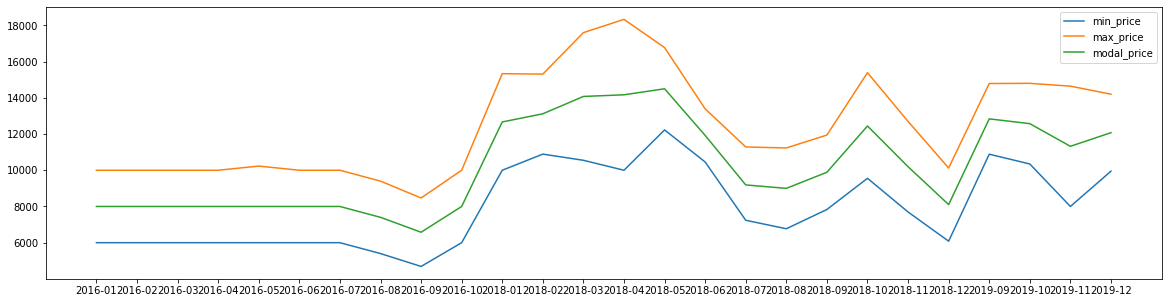

In [47]:
plt.figure(figsize = (20, 5))
plt.plot(mysore_potato['min_price'], label = 'min_price')
plt.plot(mysore_potato['max_price'], label = 'max_price')
plt.plot(mysore_potato['modal_price'], label = 'modal_price')
plt.legend(loc = 'best')

In [48]:

mysore_potato_2015 = mysore_potato[mysore_potato['Year'] == 2015]
mysore_potato_2016 = mysore_potato[mysore_potato['Year'] == 2016]
mysore_potato_2017 = mysore_potato[mysore_potato['Year'] == 2017]
mysore_potato_2018 = mysore_potato[mysore_potato['Year'] == 2018]
mysore_potato_2019 = mysore_potato[mysore_potato['Year'] == 2019]

Now let's try to plot the quantity arrived versus price plots to see how the parameters are correlated.

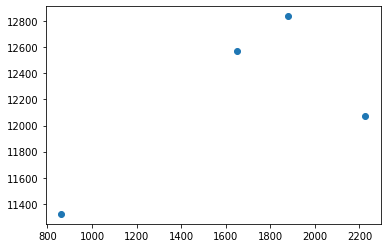

In [49]:
plt.scatter(x = mysore_potato_2019['arrivals_in_qtl'], y = mysore_potato_2019['modal_price'])
plt.show()

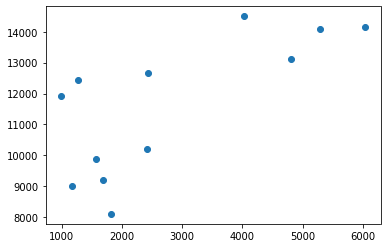

In [50]:
plt.scatter(x = mysore_potato_2018['arrivals_in_qtl'], y = mysore_potato_2018['modal_price'])
plt.show()

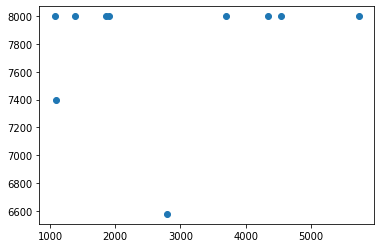

In [51]:
plt.scatter(x = mysore_potato_2016['arrivals_in_qtl'], y = mysore_potato_2016['modal_price'])
plt.show()

In [52]:
monthly_data['Commodity'] = monthly_data['Commodity'].replace(['AMBAT CHUKA', 'Ambat Chuka'], 'Ambat chuka')

In [53]:
monthly_data.Commodity.value_counts()

Gram                3972
Wheat(Husked)       3946
Sorgum(Jawar)       3560
Soybean             3545
Pigeon Pea (Tur)    3389
                    ... 
GUVAR                  1
LEAFY VEGETABLE        1
PUNVAD                 1
Punvad                 1
Skin & Bones           1
Name: Commodity, Length: 351, dtype: int64

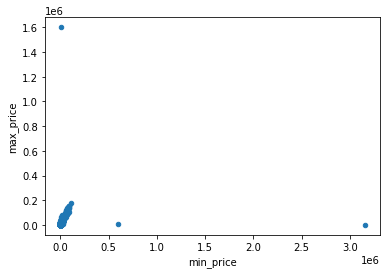

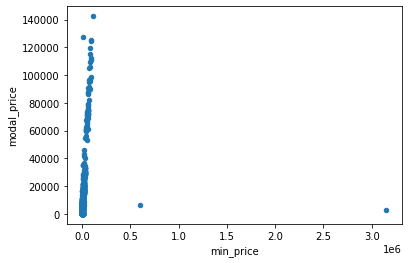

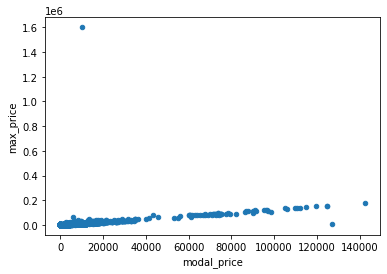

In [54]:
ax1 = monthly_data.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax2 = monthly_data.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'modal_price')
ax3 = monthly_data.sort_values(by=['Commodity']).plot.scatter(x = 'modal_price', y = 'max_price')

In [55]:
monthly_data_cleaned = monthly_data[(monthly_data.min_price <= 500000) & (monthly_data.max_price <= 1400000)]
monthly_data_cleaned.shape

(62426, 8)

In [56]:
monthly_data.shape

(62429, 8)

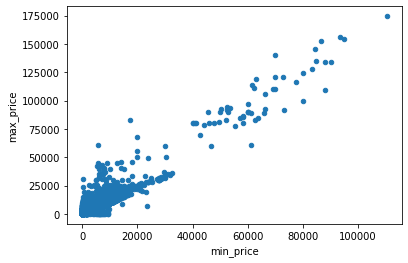

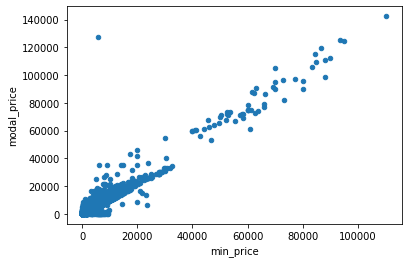

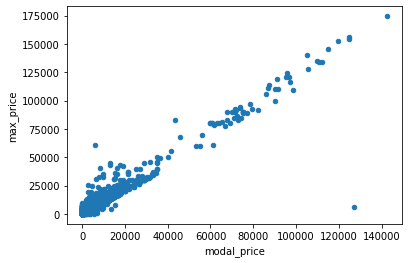

In [57]:
ax1 = monthly_data_cleaned.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax2 = monthly_data_cleaned.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'modal_price')
ax3 = monthly_data_cleaned.sort_values(by=['Commodity']).plot.scatter(x = 'modal_price', y = 'max_price')

In [58]:
monthly_data_cleaned.to_csv('monthly_data_cleaned.csv')

In [59]:
msp_mandi.to_csv('msp_mandi.csv')

PermissionError: [Errno 13] Permission denied: 'msp_mandi.csv'